<a href="https://colab.research.google.com/github/adenikeadewumi/ML-Projects/blob/main/project_notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install -U pip
!pip install -U setuptools wheel
!pip install -U "mxnet<2.0.0" bokah==2.0.1
!pip install autogluon --no-cache-dir


  Using cached mxnet-1.9.1-py3-none-manylinux2014_x86_64.whl.metadata (3.4 kB)
ERROR: Could not find a version that satisfies the requirement bokah==2.0.1 (from versions: none)
ERROR: No matching distribution found for bokah==2.0.1
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
INFO: pip is looking at multiple versions of openxlab to determine which version is compatible with other requirements. This could take a while.
INFO: pip is still looking at multiple versions of openxlab to determine which version is compatible with other requirements. This could take a while.
INFO: This is taking longer than usual. You might need to provide the dependency resolver with stricter constraints to reduce runtime. See https://pip.pypa.io/warnings/backtracking for guidance. If you want to abort this run, press Ctrl + C.
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.6/13.6 MB 188.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━

In [2]:


!mkdir -p /root/.kaggle
!touch /root/.kaggle/kaggle.json
!chmod 600 /root/.kaggle/kaggle.json


In [3]:
import json
kaggle_username= "adewumiadenike"
kaggle_key= "dea34c6618acb45a9b86cdcb9159d777"

with open("/root/.kaggle/kaggle.json", "w") as f:
    f.write(json.dumps({"username": kaggle_username, "key": kaggle_key}))

In [4]:
!kaggle competitions download -c bike-sharing-demand

  0% 0.00/189k [00:00<?, ?B/s]
100% 189k/189k [00:00<00:00, 417MB/s]


In [5]:
!unzip -o bike-sharing-demand.zip

Archive:  bike-sharing-demand.zip
  inflating: sampleSubmission.csv    
  inflating: test.csv                
  inflating: train.csv               


In [6]:
import pandas as pd
from autogluon.tabular import TabularPredictor

In [7]:
train= pd.read_csv("train.csv")
test= pd.read_csv("test.csv")

In [8]:
train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [9]:
test.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed
0,2011-01-20 00:00:00,1,0,1,1,10.66,11.365,56,26.0027
1,2011-01-20 01:00:00,1,0,1,1,10.66,13.635,56,0.0000
2,2011-01-20 02:00:00,1,0,1,1,10.66,13.635,56,0.0000
3,2011-01-20 03:00:00,1,0,1,1,10.66,12.880,56,11.0014
4,2011-01-20 04:00:00,1,0,1,1,10.66,12.880,56,11.0014


In [10]:
test.shape

(6493, 9)

In [11]:
train.shape

(10886, 12)

In [12]:
submission= pd.read_csv("sampleSubmission.csv")
submission.head()

,datetime,count
0,2011-01-20 00:00:00,0
1,2011-01-20 01:00:00,0
2,2011-01-20 02:00:00,0
3,2011-01-20 03:00:00,0
4,2011-01-20 04:00:00,0


Train model using Autogluon's Tabular Predictor

In [13]:
test.columns

Index(['datetime', 'season', 'holiday', 'workingday', 'weather', 'temp',
       'atemp', 'humidity', 'windspeed'],
      dtype='object')

In [14]:
train_new= train.drop(["casual", "registered"], axis=1)

In [15]:
predictor= TabularPredictor(label= "count").fit(train_new)

No path specified. Models will be saved in: "AutogluonModels/ag-20250607_204118"
Verbosity: 2 (Standard Logging)
=================== System Info ===================
AutoGluon Version:  1.3.1
Python Version:     3.11.13
Operating System:   Linux
Platform Machine:   x86_64
Platform Version:   #1 SMP PREEMPT_DYNAMIC Sun Mar 30 16:01:29 UTC 2025
CPU Count:          2
Memory Avail:       11.53 GB / 12.67 GB (91.0%)
Disk Space Avail:   71.91 GB / 112.64 GB (63.8%)
No presets specified! To achieve strong results with AutoGluon, it is recommended to use the available presets. Defaulting to `'medium'`...
	Recommended Presets (For more details refer to https://auto.gluon.ai/stable/tutorials/tabular/tabular-essentials.html#presets):
	presets='experimental' : New in v1.2: Pre-trained foundation model + parallel fits. The absolute best accuracy without consideration for inference speed. Does not support GPU.
	presets='best'         : Maximize accuracy. Recommended for most users. Use in competition

[1000]	valid_set's rmse: 136.065


	-135.958	 = Validation score   (-root_mean_squared_error)
	6.34s	 = Training   runtime
	0.15s	 = Validation runtime
Fitting model: LightGBM ...
	-134.0804	 = Validation score   (-root_mean_squared_error)
	2.75s	 = Training   runtime
	0.05s	 = Validation runtime
Fitting model: RandomForestMSE ...
	-122.0128	 = Validation score   (-root_mean_squared_error)
	14.59s	 = Training   runtime
	0.15s	 = Validation runtime
Fitting model: CatBoost ...
	-134.2362	 = Validation score   (-root_mean_squared_error)
	5.13s	 = Training   runtime
	0.0s	 = Validation runtime
Fitting model: ExtraTreesMSE ...
	-128.4294	 = Validation score   (-root_mean_squared_error)
	6.41s	 = Training   runtime
	0.14s	 = Validation runtime
Fitting model: NeuralNetFastAI ...
	-137.1075	 = Validation score   (-root_mean_squared_error)
	13.4s	 = Training   runtime
	0.03s	 = Validation runtime
Fitting model: XGBoost ...
	-135.769	 = Validation score   (-root_mean_squared_error)
	1.04s	 = Training   runtime
	0.01s	 = Validatio

In [16]:
predictor.fit_summary()

*** Summary of fit() ***
Estimated performance of each model:
                  model   score_val              eval_metric  pred_time_val   fit_time  pred_time_val_marginal  fit_time_marginal  stack_level  can_infer  fit_order
0        KNeighborsDist  -92.442085  root_mean_squared_error       0.013186   0.023421                0.013186           0.023421            1       True          2
1   WeightedEnsemble_L2  -92.442085  root_mean_squared_error       0.018447   0.077022                0.005261           0.053601            2       True         12
2        KNeighborsUnif -109.739422  root_mean_squared_error       0.014472   0.031329                0.014472           0.031329            1       True          1
3       RandomForestMSE -122.012844  root_mean_squared_error       0.145176  14.592063                0.145176          14.592063            1       True          5
4         ExtraTreesMSE -128.429416  root_mean_squared_error       0.135786   6.413114                0.135786   

{'model_types': {'KNeighborsUnif': 'KNNModel',
  'KNeighborsDist': 'KNNModel',
  'LightGBMXT': 'LGBModel',
  'LightGBM': 'LGBModel',
  'RandomForestMSE': 'RFModel',
  'CatBoost': 'CatBoostModel',
  'ExtraTreesMSE': 'XTModel',
  'NeuralNetFastAI': 'NNFastAiTabularModel',
  'XGBoost': 'XGBoostModel',
  'NeuralNetTorch': 'TabularNeuralNetTorchModel',
  'LightGBMLarge': 'LGBModel',
  'WeightedEnsemble_L2': 'WeightedEnsembleModel'},
 'model_performance': {'KNeighborsUnif': np.float64(-109.73942190555698),
  'KNeighborsDist': np.float64(-92.44208479870365),
  'LightGBMXT': np.float64(-135.95803375936984),
  'LightGBM': np.float64(-134.0804268849742),
  'RandomForestMSE': np.float64(-122.01284447953923),
  'CatBoost': np.float64(-134.23616330181272),
  'ExtraTreesMSE': np.float64(-128.42941608551303),
  'NeuralNetFastAI': np.float64(-137.1075136577123),
  'XGBoost': np.float64(-135.7689524728067),
  'NeuralNetTorch': np.float64(-139.4886916791355),
  'LightGBMLarge': np.float64(-130.528829346

In [17]:
predictions= predictor.predict(test)

In [18]:
predictions.head()

,count
0,51.861626
1,56.686295
2,59.077763
3,60.468830
4,61.419930


In [19]:
predictions[predictions < 0] = 0


In [20]:
submission["count"]= predictions
submission.to_csv("submission.csv", index= False)

In [21]:

!kaggle competitions submit -c bike-sharing-demand -f submission.csv -m "first raw submission"

100% 188k/188k [00:00<00:00, 345kB/s]
Successfully submitted to Bike Sharing Demand

In [22]:
!kaggle competitions submissions -c bike-sharing-demand | tail -n +1 | head -n 6

fileName                     date                        description                                   status                     publicScore  privateScore  
---------------------------  --------------------------  --------------------------------------------  -------------------------  -----------  ------------  
submission.csv               2025-06-07 20:42:58.397000  first raw submission                          SubmissionStatus.COMPLETE  1.86412      1.86412       
submission_new_features.csv  2025-06-07 18:54:11.447000  new features submission                       SubmissionStatus.COMPLETE  0.50431      0.50431       
submission_new_hpo.csv       2025-06-07 18:08:45.220000  new features with hyperparameters submission  SubmissionStatus.COMPLETE  0.49997      0.49997       
submission_new_features.csv  2025-06-07 17:45:25.050000  new features submission                       SubmissionStatus.COMPLETE  0.48906      0.48906       


Got an initial score of 1.86412

Exploratory Data Analysis

array([[<Axes: title={'center': 'season'}>,
        <Axes: title={'center': 'holiday'}>,
        <Axes: title={'center': 'workingday'}>],
       [<Axes: title={'center': 'weather'}>,
        <Axes: title={'center': 'temp'}>,
        <Axes: title={'center': 'atemp'}>],
       [<Axes: title={'center': 'humidity'}>,
        <Axes: title={'center': 'windspeed'}>,
        <Axes: title={'center': 'casual'}>],
       [<Axes: title={'center': 'registered'}>,
        <Axes: title={'center': 'count'}>, <Axes: >]], dtype=object)

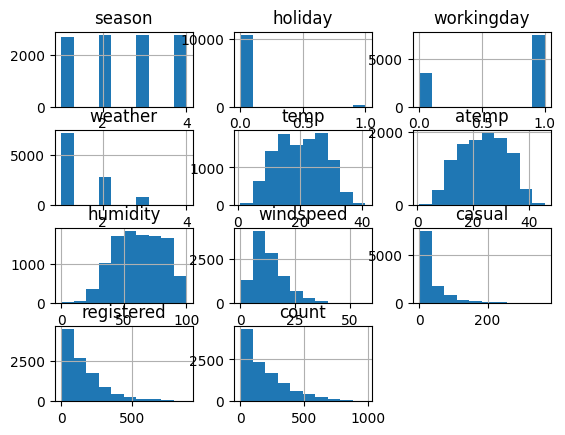

In [23]:
train.hist()

array([[<Axes: title={'center': 'season'}>,
        <Axes: title={'center': 'holiday'}>,
        <Axes: title={'center': 'workingday'}>],
       [<Axes: title={'center': 'weather'}>,
        <Axes: title={'center': 'temp'}>,
        <Axes: title={'center': 'atemp'}>],
       [<Axes: title={'center': 'humidity'}>,
        <Axes: title={'center': 'windspeed'}>,
        <Axes: title={'center': 'count'}>]], dtype=object)

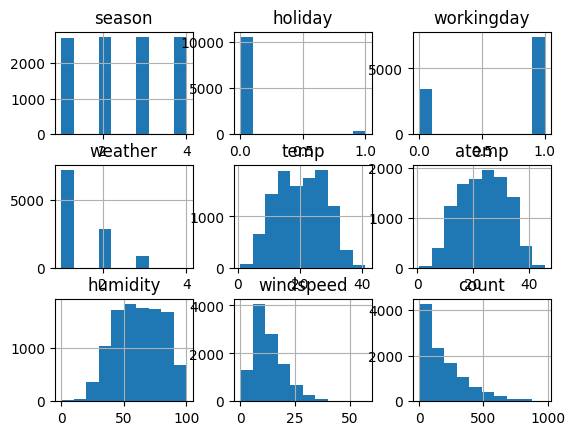

In [24]:
train_new.hist()

In [25]:
train_new.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,1


In [26]:
train_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   count       10886 non-null  int64  
dtypes: float64(3), int64(6), object(1)
memory usage: 850.6+ KB


In [27]:
train_new.describe()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,count
count,10886.000000,10886.000000,10886.000000,10886.000000,10886.00000,10886.000000,10886.000000,10886.000000,10886.000000
mean,2.506614,0.028569,0.680875,1.418427,20.23086,23.655084,61.886460,12.799395,191.574132
std,1.116174,0.166599,0.466159,0.633839,7.79159,8.474601,19.245033,8.164537,181.144454
min,1.000000,0.000000,0.000000,1.000000,0.82000,0.760000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,0.000000,1.000000,13.94000,16.665000,47.000000,7.001500,42.000000
50%,3.000000,0.000000,1.000000,1.000000,20.50000,24.240000,62.000000,12.998000,145.000000
75%,4.000000,0.000000,1.000000,2.000000,26.24000,31.060000,77.000000,16.997900,284.000000
max,4.000000,1.000000,1.000000,4.000000,41.00000,45.455000,100.000000,56.996900,977.000000


In [28]:
train_new.corr(numeric_only=True)

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,count
season,1.000000,0.029368,-0.008126,0.008879,0.258689,0.264744,0.190610,-0.147121,0.163439
holiday,0.029368,1.000000,-0.250491,-0.007074,0.000295,-0.005215,0.001929,0.008409,-0.005393
workingday,-0.008126,-0.250491,1.000000,0.033772,0.029966,0.024660,-0.010880,0.013373,0.011594
weather,0.008879,-0.007074,0.033772,1.000000,-0.055035,-0.055376,0.406244,0.007261,-0.128655
temp,0.258689,0.000295,0.029966,-0.055035,1.000000,0.984948,-0.064949,-0.017852,0.394454
atemp,0.264744,-0.005215,0.024660,-0.055376,0.984948,1.000000,-0.043536,-0.057473,0.389784
humidity,0.190610,0.001929,-0.010880,0.406244,-0.064949,-0.043536,1.000000,-0.318607,-0.317371
windspeed,-0.147121,0.008409,0.013373,0.007261,-0.017852,-0.057473,-0.318607,1.000000,0.101369
count,0.163439,-0.005393,0.011594,-0.128655,0.394454,0.389784,-0.317371,0.101369,1.000000


In [29]:
#Create new feature from the difference between temp and atemp(the temp feeling)
train_new['temp_atemp_diff'] = train_new['temp'] - train_new['atemp']

#Get the range of wind condititon in which people will ride bike
train_new['ideal_windspeed'] = ((train_new['windspeed'] >= 5) & (train_new['windspeed'] <= 10)).astype("category")

# create new feature that uses windspeed to categories whether it's windy
train_new['is_windy'] = (train_new['windspeed'] > 30).astype("category")

train_new['humidity_temp_ratio'] = train_new['humidity'] / (train_new['temp']+ 1e-6)

# For train_new
train_new["season"] = train_new["season"].astype("category")
train_new["weather"] = train_new["weather"].astype("category")


In [32]:
#For test
test["temp_atemp_diff"]= test["temp"]- test["atemp"]
test["ideal_windspeed"]= ((test["windspeed"]>=5) & (test["windspeed"]<=10)).astype("category")
test["is_windy"]= (test["windspeed"]>30).astype("category")
test["humidity_temp_ratio"]= test["humidity"]/(test["temp"]+1e-6)
test["season"] = test["season"].astype("category")
test["weather"] = test["weather"].astype("category")

In [33]:
train_new['datetime'] = pd.to_datetime(train_new['datetime'])
train_new['hour'] = train_new['datetime'].dt.hour
train_new['dayofweek'] = train_new['datetime'].dt.dayofweek
train_new['month'] = train_new['datetime'].dt.month
train_new['is_weekend'] = train_new['dayofweek'].isin([5, 6]).astype("category")



In [34]:
# For test
test['datetime'] = pd.to_datetime(test['datetime'])  # Adjust column name
test['hour'] = test['datetime'].dt.hour
test['dayofweek'] = test['datetime'].dt.dayofweek
test['month'] = test['datetime'].dt.month
test['is_weekend'] = test['dayofweek'].isin([5, 6]).astype("category")



In [35]:
predictor_new_features= TabularPredictor(label= "count").fit(train_new)

No path specified. Models will be saved in: "AutogluonModels/ag-20250607_204403"
Verbosity: 2 (Standard Logging)
=================== System Info ===================
AutoGluon Version:  1.3.1
Python Version:     3.11.13
Operating System:   Linux
Platform Machine:   x86_64
Platform Version:   #1 SMP PREEMPT_DYNAMIC Sun Mar 30 16:01:29 UTC 2025
CPU Count:          2
Memory Avail:       10.61 GB / 12.67 GB (83.7%)
Disk Space Avail:   71.36 GB / 112.64 GB (63.4%)
No presets specified! To achieve strong results with AutoGluon, it is recommended to use the available presets. Defaulting to `'medium'`...
	Recommended Presets (For more details refer to https://auto.gluon.ai/stable/tutorials/tabular/tabular-essentials.html#presets):
	presets='experimental' : New in v1.2: Pre-trained foundation model + parallel fits. The absolute best accuracy without consideration for inference speed. Does not support GPU.
	presets='best'         : Maximize accuracy. Recommended for most users. Use in competition

[1000]	valid_set's rmse: 38.3107
[2000]	valid_set's rmse: 36.8848
[3000]	valid_set's rmse: 36.6208
[4000]	valid_set's rmse: 36.46
[5000]	valid_set's rmse: 36.51


	-36.455	 = Validation score   (-root_mean_squared_error)
	6.12s	 = Training   runtime
	0.29s	 = Validation runtime
Fitting model: LightGBM ...


[1000]	valid_set's rmse: 35.5606


	-35.4767	 = Validation score   (-root_mean_squared_error)
	1.7s	 = Training   runtime
	0.06s	 = Validation runtime
Fitting model: RandomForestMSE ...
	-38.9653	 = Validation score   (-root_mean_squared_error)
	18.41s	 = Training   runtime
	0.14s	 = Validation runtime
Fitting model: CatBoost ...
	-36.5514	 = Validation score   (-root_mean_squared_error)
	23.8s	 = Training   runtime
	0.01s	 = Validation runtime
Fitting model: ExtraTreesMSE ...
	-40.9787	 = Validation score   (-root_mean_squared_error)
	7.33s	 = Training   runtime
	0.24s	 = Validation runtime
Fitting model: NeuralNetFastAI ...
	-43.962	 = Validation score   (-root_mean_squared_error)
	8.92s	 = Training   runtime
	0.02s	 = Validation runtime
Fitting model: XGBoost ...
	-35.9793	 = Validation score   (-root_mean_squared_error)
	3.55s	 = Training   runtime
	0.1s	 = Validation runtime
Fitting model: NeuralNetTorch ...
	-38.2834	 = Validation score   (-root_mean_squared_error)
	119.54s	 = Training   runtime
	0.02s	 = Validati

In [36]:
predictor_new_features.fit_summary()

*** Summary of fit() ***
Estimated performance of each model:
                  model   score_val              eval_metric  pred_time_val    fit_time  pred_time_val_marginal  fit_time_marginal  stack_level  can_infer  fit_order
0   WeightedEnsemble_L2  -32.825427  root_mean_squared_error       0.408848  156.214479                0.000412           0.015264            2       True         12
1         LightGBMLarge  -34.151812  root_mean_squared_error       0.070886    4.089410                0.070886           4.089410            1       True         11
2              LightGBM  -35.476677  root_mean_squared_error       0.062733    1.695942                0.062733           1.695942            1       True          4
3               XGBoost  -35.979321  root_mean_squared_error       0.101906    3.549463                0.101906           3.549463            1       True          9
4            LightGBMXT  -36.454969  root_mean_squared_error       0.293675    6.116644                0.293

{'model_types': {'KNeighborsUnif': 'KNNModel',
  'KNeighborsDist': 'KNNModel',
  'LightGBMXT': 'LGBModel',
  'LightGBM': 'LGBModel',
  'RandomForestMSE': 'RFModel',
  'CatBoost': 'CatBoostModel',
  'ExtraTreesMSE': 'XTModel',
  'NeuralNetFastAI': 'NNFastAiTabularModel',
  'XGBoost': 'XGBoostModel',
  'NeuralNetTorch': 'TabularNeuralNetTorchModel',
  'LightGBMLarge': 'LGBModel',
  'WeightedEnsemble_L2': 'WeightedEnsembleModel'},
 'model_performance': {'KNeighborsUnif': np.float64(-109.73942190555698),
  'KNeighborsDist': np.float64(-92.44208479870365),
  'LightGBMXT': np.float64(-36.45496915826831),
  'LightGBM': np.float64(-35.476677094435516),
  'RandomForestMSE': np.float64(-38.965332806565776),
  'CatBoost': np.float64(-36.5513597336013),
  'ExtraTreesMSE': np.float64(-40.978700106829805),
  'NeuralNetFastAI': np.float64(-43.96202816696564),
  'XGBoost': np.float64(-35.97932082272033),
  'NeuralNetTorch': np.float64(-38.283364255735165),
  'LightGBMLarge': np.float64(-34.15181211395

In [37]:
predictions1= predictor_new_features.predict(test)
predictions1.head()

,count
0,10.669044
1,2.206294
2,-1.067218
3,0.826497
4,1.275538


In [38]:
predictions1.describe()

,count
count,6493.000000
mean,192.177689
std,171.802322
min,-14.101079
25%,46.929073
50%,153.750153
75%,286.410736
max,874.774170


In [39]:
predictions1[predictions1<0]=0

In [40]:
predictions1

,count
0,10.669044
1,2.206294
2,0.000000
3,0.826497
4,1.275538
...,...
6488,357.872162
6489,246.064209
6490,169.853012
6491,107.033562


In [41]:
submission_new_features= pd.read_csv("sampleSubmission.csv")
submission_new_features["count"]= predictions1
submission_new_features.head()

,datetime,count
0,2011-01-20 00:00:00,10.669044
1,2011-01-20 01:00:00,2.206294
2,2011-01-20 02:00:00,0.000000
3,2011-01-20 03:00:00,0.826497
4,2011-01-20 04:00:00,1.275538


In [42]:
submission_new_features.to_csv("submission_new_features.csv", index= False)

In [43]:
!kaggle competitions submit -c bike-sharing-demand -f submission_new_features.csv -m "new features submission"

100% 188k/188k [00:00<00:00, 312kB/s]
Successfully submitted to Bike Sharing Demand

In [44]:
!kaggle competitions submissions -c bike-sharing-demand | tail -n +1 | head -n 6

fileName                     date                        description                                   status                     publicScore  privateScore  
---------------------------  --------------------------  --------------------------------------------  -------------------------  -----------  ------------  
submission_new_features.csv  2025-06-07 20:52:23.003000  new features submission                       SubmissionStatus.PENDING                              
submission.csv               2025-06-07 20:42:58.397000  first raw submission                          SubmissionStatus.COMPLETE  1.86412      1.86412       
submission_new_features.csv  2025-06-07 18:54:11.447000  new features submission                       SubmissionStatus.COMPLETE  0.50431      0.50431       
submission_new_hpo.csv       2025-06-07 18:08:45.220000  new features with hyperparameters submission  SubmissionStatus.COMPLETE  0.49997      0.49997       


Score- 0.48906

Hyperparameter optimization

In [45]:

# Define label column
label = 'count'

# Define model hyperparameter
hyperparameters = {
    'XGB': {
        'n_estimators': 100,
        'max_depth': 10,
        'learning_rate': 0.1,
        'subsample': 0.8,
        'colsample_bytree': 0.9,
    },
    'GBM': [
        {},  # use default
        {
            'extra_trees': True,
            'ag_args': {'name_suffix': 'XT'},
            'num_boost_round': 300
        }
    ],
    'CAT': {},  # Use CatBoost with default params
}

# Define hyperparameter tuning configuration
hyperparameter_tune_kwargs = {
    'num_trials': 10,                # Total HPO trials
    'scheduler': 'local',            # Use local scheduler
    'searcher': 'random'             # Can also be 'bayesopt' or 'grid'
}

# Train with tuning
predictor_new_hpo = TabularPredictor(label=label).fit(
    train_data=train_new,
    time_limit=600,                              # Total seconds
    presets='best_quality',
    hyperparameters=hyperparameters,
    hyperparameter_tune_kwargs=hyperparameter_tune_kwargs
)

No path specified. Models will be saved in: "AutogluonModels/ag-20250607_205225"
Verbosity: 2 (Standard Logging)
=================== System Info ===================
AutoGluon Version:  1.3.1
Python Version:     3.11.13
Operating System:   Linux
Platform Machine:   x86_64
Platform Version:   #1 SMP PREEMPT_DYNAMIC Sun Mar 30 16:01:29 UTC 2025
CPU Count:          2
Memory Avail:       10.45 GB / 12.67 GB (82.4%)
Disk Space Avail:   70.86 GB / 112.64 GB (62.9%)
Presets specified: ['best_quality']
Setting dynamic_stacking from 'auto' to True. Reason: Enable dynamic_stacking when use_bag_holdout is disabled. (use_bag_holdout=False)
Stack configuration (auto_stack=True): num_stack_levels=1, num_bag_folds=8, num_bag_sets=1
DyStack is enabled (dynamic_stacking=True). AutoGluon will try to determine whether the input data is affected by stacked overfitting and enable or disable stacking as a consequence.
	This is used to identify the optimal `num_stack_levels` value. Copies of AutoGluon will be

(_ray_fit pid=5081) [1000]	valid_set's rmse: 34.6607


(_ray_fit pid=5080) 	Ran out of time, early stopping on iteration 1363. Best iteration is:
(_ray_fit pid=5080) 	[1281]	valid_set's rmse: 37.0666


(_ray_fit pid=5186) [1000]	valid_set's rmse: 36.6991 [repeated 2x across cluster] (Ray deduplicates logs by default. Set RAY_DEDUP_LOGS=0 to disable log deduplication, or see https://docs.ray.io/en/master/ray-observability/user-guides/configure-logging.html#log-deduplication for more options.)


(_ray_fit pid=5186) 	Ran out of time, early stopping on iteration 2276. Best iteration is:
(_ray_fit pid=5186) 	[2268]	valid_set's rmse: 36.2513


(_ray_fit pid=5296) [1000]	valid_set's rmse: 32.8988 [repeated 3x across cluster]
(_ray_fit pid=5410) [1000]	valid_set's rmse: 33.4874 [repeated 2x across cluster]


(_dystack pid=4928) 	Stopping HPO to satisfy time limit...
  0%|          | 0/10 [00:40<?, ?it/s]
(_dystack pid=4928) Fitted model: LightGBM_BAG_L1/T1 ...
(_dystack pid=4928) 	-34.9575	 = Validation score   (-root_mean_squared_error)
(_dystack pid=4928) 	40.69s	 = Training   runtime
(_dystack pid=4928) 	2.4s	 = Validation runtime
(_dystack pid=4928) Hyperparameter tuning model: LightGBMXT_BAG_L1 ... Tuning model for up to 21.77s of the 104.46s of remaining time.
  0%|          | 0/10 [00:00<?, ?it/s]	Fitting 8 child models (S1F1 - S1F8) | Fitting with ParallelLocalFoldFittingStrategy (2 workers, per: cpus=1, gpus=0, memory=0.10%)
(_dystack pid=4928) 	Stopping HPO to satisfy time limit...
  0%|          | 0/10 [00:28<?, ?it/s]
(_dystack pid=4928) Fitted model: LightGBMXT_BAG_L1/T1 ...
(_dystack pid=4928) 	-48.7224	 = Validation score   (-root_mean_squared_error)
(_dystack pid=4928) 	28.68s	 = Training   runtime
(_dystack pid=4928) 	0.5s	 = Validation runtime
(_dystack pid=4928) Hyperpar

  0%|          | 0/10 [00:00<?, ?it/s]

	Fitting 8 child models (S1F1 - S1F8) | Fitting with ParallelLocalFoldFittingStrategy (2 workers, per: cpus=1, gpus=0, memory=0.12%)
	Stopping HPO to satisfy time limit...
Fitted model: LightGBM_BAG_L1/T1 ...
	-34.2548	 = Validation score   (-root_mean_squared_error)
	49.97s	 = Training   runtime
	2.73s	 = Validation runtime
Hyperparameter tuning model: LightGBMXT_BAG_L1 ... Tuning model for up to 57.07s of the 330.49s of remaining time.


  0%|          | 0/10 [00:00<?, ?it/s]

	Fitting 8 child models (S1F1 - S1F8) | Fitting with ParallelLocalFoldFittingStrategy (2 workers, per: cpus=1, gpus=0, memory=0.10%)
	Stopping HPO to satisfy time limit...
Fitted model: LightGBMXT_BAG_L1/T1 ...
	-48.333	 = Validation score   (-root_mean_squared_error)
	29.86s	 = Training   runtime
	0.42s	 = Validation runtime
Hyperparameter tuning model: CatBoost_BAG_L1 ... Tuning model for up to 57.07s of the 300.54s of remaining time.


  0%|          | 0/10 [00:00<?, ?it/s]

	Fitting 8 child models (S1F1 - S1F8) | Fitting with ParallelLocalFoldFittingStrategy (2 workers, per: cpus=1, gpus=0, memory=4.08%)
	Stopping HPO to satisfy time limit...
Fitted model: CatBoost_BAG_L1/T1 ...
	-37.9164	 = Validation score   (-root_mean_squared_error)
	54.98s	 = Training   runtime
	0.12s	 = Validation runtime
Hyperparameter tuning model: XGBoost_BAG_L1 ... Tuning model for up to 57.07s of the 245.47s of remaining time.


  0%|          | 0/10 [00:00<?, ?it/s]

	Fitting 8 child models (S1F1 - S1F8) | Fitting with ParallelLocalFoldFittingStrategy (2 workers, per: cpus=1, gpus=0, memory=0.65%)
	Fitting 8 child models (S1F1 - S1F8) | Fitting with ParallelLocalFoldFittingStrategy (2 workers, per: cpus=1, gpus=0, memory=0.66%)
	Stopping HPO to satisfy time limit...
Fitted model: XGBoost_BAG_L1/T1 ...
	-36.8028	 = Validation score   (-root_mean_squared_error)
	28.46s	 = Training   runtime
	0.54s	 = Validation runtime
Fitted model: XGBoost_BAG_L1/T2 ...
	-36.1486	 = Validation score   (-root_mean_squared_error)
	26.07s	 = Training   runtime
	0.58s	 = Validation runtime
Fitting model: WeightedEnsemble_L2 ... Training model for up to 360.00s of the 190.83s of remaining time.
	Ensemble Weights: {'LightGBM_BAG_L1/T1': 0.6, 'XGBoost_BAG_L1/T2': 0.16, 'CatBoost_BAG_L1/T1': 0.12, 'XGBoost_BAG_L1/T1': 0.12}
	-33.5842	 = Validation score   (-root_mean_squared_error)
	0.04s	 = Training   runtime
	0.0s	 = Validation runtime
Fitting 4 L2 models, fit_strategy="s

  0%|          | 0/10 [00:00<?, ?it/s]

	Fitting 8 child models (S1F1 - S1F8) | Fitting with ParallelLocalFoldFittingStrategy (2 workers, per: cpus=1, gpus=0, memory=0.15%)
	Stopping HPO to satisfy time limit...
Fitted model: LightGBM_BAG_L2/T1 ...
	-34.5179	 = Validation score   (-root_mean_squared_error)
	32.62s	 = Training   runtime
	0.43s	 = Validation runtime
Hyperparameter tuning model: LightGBMXT_BAG_L2 ... Tuning model for up to 42.92s of the 158.04s of remaining time.


  0%|          | 0/10 [00:00<?, ?it/s]

	Fitting 8 child models (S1F1 - S1F8) | Fitting with ParallelLocalFoldFittingStrategy (2 workers, per: cpus=1, gpus=0, memory=0.13%)
	Stopping HPO to satisfy time limit...
Fitted model: LightGBMXT_BAG_L2/T1 ...
	-34.7553	 = Validation score   (-root_mean_squared_error)
	30.11s	 = Training   runtime
	0.25s	 = Validation runtime
Hyperparameter tuning model: CatBoost_BAG_L2 ... Tuning model for up to 42.92s of the 127.86s of remaining time.


  0%|          | 0/10 [00:00<?, ?it/s]

	Fitting 8 child models (S1F1 - S1F8) | Fitting with ParallelLocalFoldFittingStrategy (2 workers, per: cpus=1, gpus=0, memory=4.14%)
	Stopping HPO to satisfy time limit...
Fitted model: CatBoost_BAG_L2/T1 ...
	-34.1448	 = Validation score   (-root_mean_squared_error)
	46.65s	 = Training   runtime
	0.11s	 = Validation runtime
Hyperparameter tuning model: XGBoost_BAG_L2 ... Tuning model for up to 42.92s of the 81.14s of remaining time.


  0%|          | 0/10 [00:00<?, ?it/s]

	Fitting 8 child models (S1F1 - S1F8) | Fitting with ParallelLocalFoldFittingStrategy (2 workers, per: cpus=1, gpus=0, memory=0.81%)
	Stopping HPO to satisfy time limit...
Fitted model: XGBoost_BAG_L2/T1 ...
	-35.685	 = Validation score   (-root_mean_squared_error)
	27.66s	 = Training   runtime
	0.17s	 = Validation runtime
Fitting model: WeightedEnsemble_L3 ... Training model for up to 360.00s of the 53.39s of remaining time.
	Ensemble Weights: {'LightGBM_BAG_L1/T1': 0.5, 'CatBoost_BAG_L2/T1': 0.214, 'CatBoost_BAG_L1/T1': 0.071, 'XGBoost_BAG_L1/T1': 0.071, 'XGBoost_BAG_L1/T2': 0.071, 'LightGBMXT_BAG_L2/T1': 0.071}
	-33.5259	 = Validation score   (-root_mean_squared_error)
	0.05s	 = Training   runtime
	0.0s	 = Validation runtime
AutoGluon training complete, total runtime = 328.09s ... Best model: WeightedEnsemble_L3 | Estimated inference throughput: 287.1 rows/s (1361 batch size)
TabularPredictor saved. To load, use: predictor = TabularPredictor.load("/content/AutogluonModels/ag-2025060

In [46]:
predictor_new_hpo.fit_summary()

*** Summary of fit() ***
Estimated performance of each model:
                   model  score_val              eval_metric  pred_time_val    fit_time  pred_time_val_marginal  fit_time_marginal  stack_level  can_infer  fit_order
0    WeightedEnsemble_L3 -33.525902  root_mean_squared_error       4.740970  266.143945                0.000701           0.045439            3       True         11
1    WeightedEnsemble_L2 -33.584214  root_mean_squared_error       3.962094  159.513406                0.000614           0.035838            2       True          6
2     CatBoost_BAG_L2/T1 -34.144793  root_mean_squared_error       4.494382  235.988089                0.109783          46.646973            2       True          9
3     LightGBM_BAG_L1/T1 -34.254810  root_mean_squared_error       2.726798   49.967608                2.726798          49.967608            1       True          1
4     LightGBM_BAG_L2/T1 -34.517889  root_mean_squared_error       4.813154  221.962694                0.428

{'model_types': {'LightGBM_BAG_L1/T1': 'StackerEnsembleModel_LGB',
  'LightGBMXT_BAG_L1/T1': 'StackerEnsembleModel_LGB',
  'CatBoost_BAG_L1/T1': 'StackerEnsembleModel_CatBoost',
  'XGBoost_BAG_L1/T1': 'StackerEnsembleModel_XGBoost',
  'XGBoost_BAG_L1/T2': 'StackerEnsembleModel_XGBoost',
  'WeightedEnsemble_L2': 'WeightedEnsembleModel',
  'LightGBM_BAG_L2/T1': 'StackerEnsembleModel_LGB',
  'LightGBMXT_BAG_L2/T1': 'StackerEnsembleModel_LGB',
  'CatBoost_BAG_L2/T1': 'StackerEnsembleModel_CatBoost',
  'XGBoost_BAG_L2/T1': 'StackerEnsembleModel_XGBoost',
  'WeightedEnsemble_L3': 'WeightedEnsembleModel'},
 'model_performance': {'LightGBM_BAG_L1/T1': np.float64(-34.254810413002936),
  'LightGBMXT_BAG_L1/T1': np.float64(-48.33298066837798),
  'CatBoost_BAG_L1/T1': np.float64(-37.91643738406019),
  'XGBoost_BAG_L1/T1': np.float64(-36.8028015507973),
  'XGBoost_BAG_L1/T2': np.float64(-36.14859776858835),
  'WeightedEnsemble_L2': np.float64(-33.58421405991836),
  'LightGBM_BAG_L2/T1': np.float64(

In [47]:
predictions2 = predictor_new_hpo.predict(test)
predictions2.describe()

,count
count,6493.000000
mean,192.025909
std,173.853882
min,-8.807080
25%,46.377892
50%,150.716461
75%,284.359924
max,885.033447


In [48]:
predictions2[predictions2 < 0] = 0

In [49]:
submission_new_hpo= pd.read_csv("sampleSubmission.csv")


In [50]:
submission_new_hpo["count"] = predictions2

submission_new_hpo.head()

,datetime,count
0,2011-01-20 00:00:00,12.723954
1,2011-01-20 01:00:00,1.522803
2,2011-01-20 02:00:00,0.000000
3,2011-01-20 03:00:00,2.302017
4,2011-01-20 04:00:00,2.226074


In [51]:
submission_new_hpo.to_csv("submission_new_hpo.csv", index=False)

In [52]:
!kaggle competitions submit -c bike-sharing-demand -f submission_new_hpo.csv -m "new features with hyperparameters submission"

100% 188k/188k [00:00<00:00, 336kB/s]
Successfully submitted to Bike Sharing Demand

In [63]:
!kaggle competitions submissions -c bike-sharing-demand | tail -n +1 | head -n 6

fileName                     date                        description                                   status                     publicScore  privateScore  
---------------------------  --------------------------  --------------------------------------------  -------------------------  -----------  ------------  
submission_new_hpo.csv       2025-06-07 21:02:06.650000  new features with hyperparameters submission  SubmissionStatus.COMPLETE  0.49587      0.49587       
submission_new_features.csv  2025-06-07 20:52:23.003000  new features submission                       SubmissionStatus.COMPLETE  0.50577      0.50577       
submission.csv               2025-06-07 20:42:58.397000  first raw submission                          SubmissionStatus.COMPLETE  1.86412      1.86412       
submission_new_features.csv  2025-06-07 18:54:11.447000  new features submission                       SubmissionStatus.COMPLETE  0.50431      0.50431       


In [58]:
leaderboard = predictor.leaderboard(silent=True)
best_score = leaderboard.iloc[0]['score_val']  # or 'score_val', depending on your metric
print("Best score:", best_score)
#Create empty list
score=[]
score.append(best_score)

Best score: -92.44208479870365


In [59]:
leaderboard = predictor_new_features.leaderboard(silent=True)
best_score_feat = leaderboard.iloc[0]['score_val']  # or 'score_val', depending on your metric
print("Best score:", best_score_feat)
score.append(best_score_feat)

Best score: -32.825426770850314


In [60]:
leaderboard = predictor_new_hpo.leaderboard(silent=True)
best_score_hpo = leaderboard.iloc[0]['score_val']  # or 'score_val', depending on your metric
print("Best score:", best_score_hpo)
score.append(best_score_hpo)

Best score: -33.52590173599783


In [61]:
score

[np.float64(-92.44208479870365),
 np.float64(-32.825426770850314),
 np.float64(-33.52590173599783)]

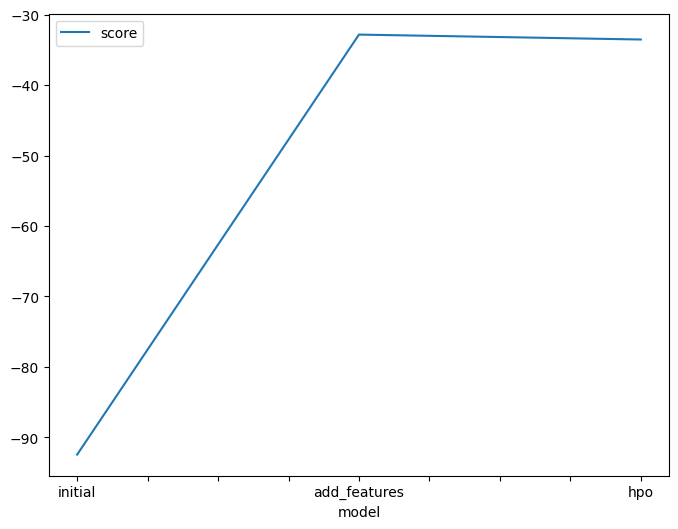

In [62]:

# Taking the top model score from each training run and creating a line plot to show improvement
# You can create these in the notebook and save them to PNG or use some other tool (e.g. google sheets, excel)
fig = pd.DataFrame(
    {
        "model": ["initial", "add_features", "hpo"],
        "score": score
    }
).plot(x="model", y="score", figsize=(8, 6)).get_figure()
fig.savefig('model_train_score.png')

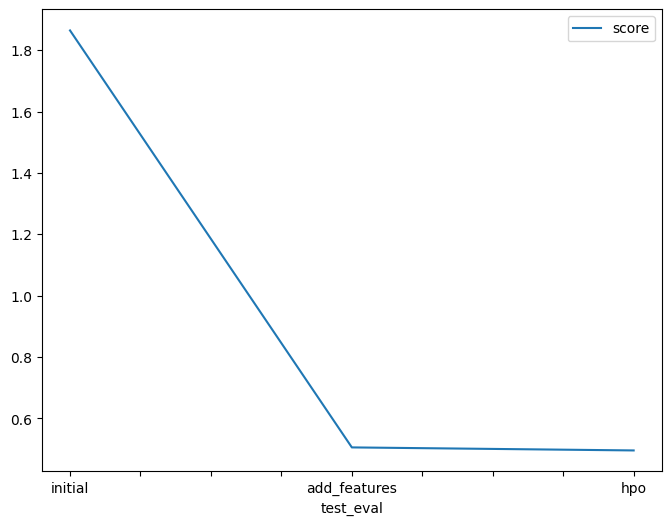

In [64]:

# Take the 3 kaggle scores and creating a line plot to show improvement
fig = pd.DataFrame(
    {
        "test_eval": ["initial", "add_features", "hpo"],
        "score": [1.86412, 0.50577, 0.49587]
    }
).plot(x="test_eval", y="score", figsize=(8, 6)).get_figure()
fig.savefig('model_test_score.png')

In [65]:

# The 3 hyperparameters we tuned with the kaggle score as the result
pd.DataFrame({
    "model": ["initial", "add_features", "hpo"],
    "hpo1": [?, ?, ?],
    "hpo2": [?, ?, ?],
    "hpo3": [?, ?, ?],
    "score": [?, ?, ?]
})

SyntaxError: invalid syntax (<ipython-input-65-619734f0b455>, line 4)